In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

In [6]:
## Data Load

In [7]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={"parcelid": int})

In [8]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={"parcelid": int})

/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [10]:
train_df = train_df1.copy()

2017년도 데이터는 생략하겠습니다.

## SQRT feature data analysis

- 'basementsqft'
- 'finishedfloor1squarefeet'
- 'calculatedfinishedsquarefeet'
- 'finishedsquarefeet6'
- 'finishedsquarefeet12'
- 'finishedsquarefeet13'
- 'finishedsquarefeet15'
- 'finishedsquarefeet50'
- 'lotsizesquarefeet'

In [3]:
sqrt_feature= [
        '지하 square foot(평수를 의미)',
          '집 내 3/4 욕실 수 (샤워 + 세면대 + 화장실)',
          '가정의 첫 번째 (출입국) 층에있는 완숙 지역의 크기',
        '미완성 완전 공간 지역',
        '완성된 주요 주거 공간',
        '주변 생활 공간',
        '전체 면적',
        '1층 면적',
       ' 로트 면적(lot는 area of zoning lot을 의미한다.)'
]

In [15]:
sqrt_feature_col =[
    'basementsqft',
'finishedfloor1squarefeet',
'calculatedfinishedsquarefeet',
'finishedsquarefeet6',
'finishedsquarefeet12',
'finishedsquarefeet13',
'finishedsquarefeet15',
'finishedsquarefeet50',
'lotsizesquarefeet'
]

In [16]:
sqrt_df = pd.DataFrame(columns=['name','feature'])
sqrt_df.name = sqrt_feature_col
sqrt_df.feature = sqrt_feature
sqrt_df

,name,feature
0,basementsqft,지하 square foot(평수를 의미)
1,finishedfloor1squarefeet,집 내 3/4 욕실 수 (샤워 + 세면대 + 화장실)
2,calculatedfinishedsquarefeet,가정의 첫 번째 (출입국) 층에있는 완숙 지역의 크기
3,finishedsquarefeet6,미완성 완전 공간 지역
4,finishedsquarefeet12,완성된 주요 주거 공간
5,finishedsquarefeet13,주변 생활 공간
6,finishedsquarefeet15,전체 면적
7,finishedsquarefeet50,1층 면적
8,lotsizesquarefeet,로트 면적(lot는 area of zoning lot을 의미한다.)


In [17]:
print(train_df[sqrt_feature_col].dtypes,end='\n\n'),
print('Number of sqrt_feature_col:  {}'.format(len(sqrt_feature_col)))

basementsqft                    float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet6             float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
lotsizesquarefeet               float64
dtype: object

Number of sqrt_feature_col:  9


## Inidividual column's feature analysis

### Regression plot about numerical data

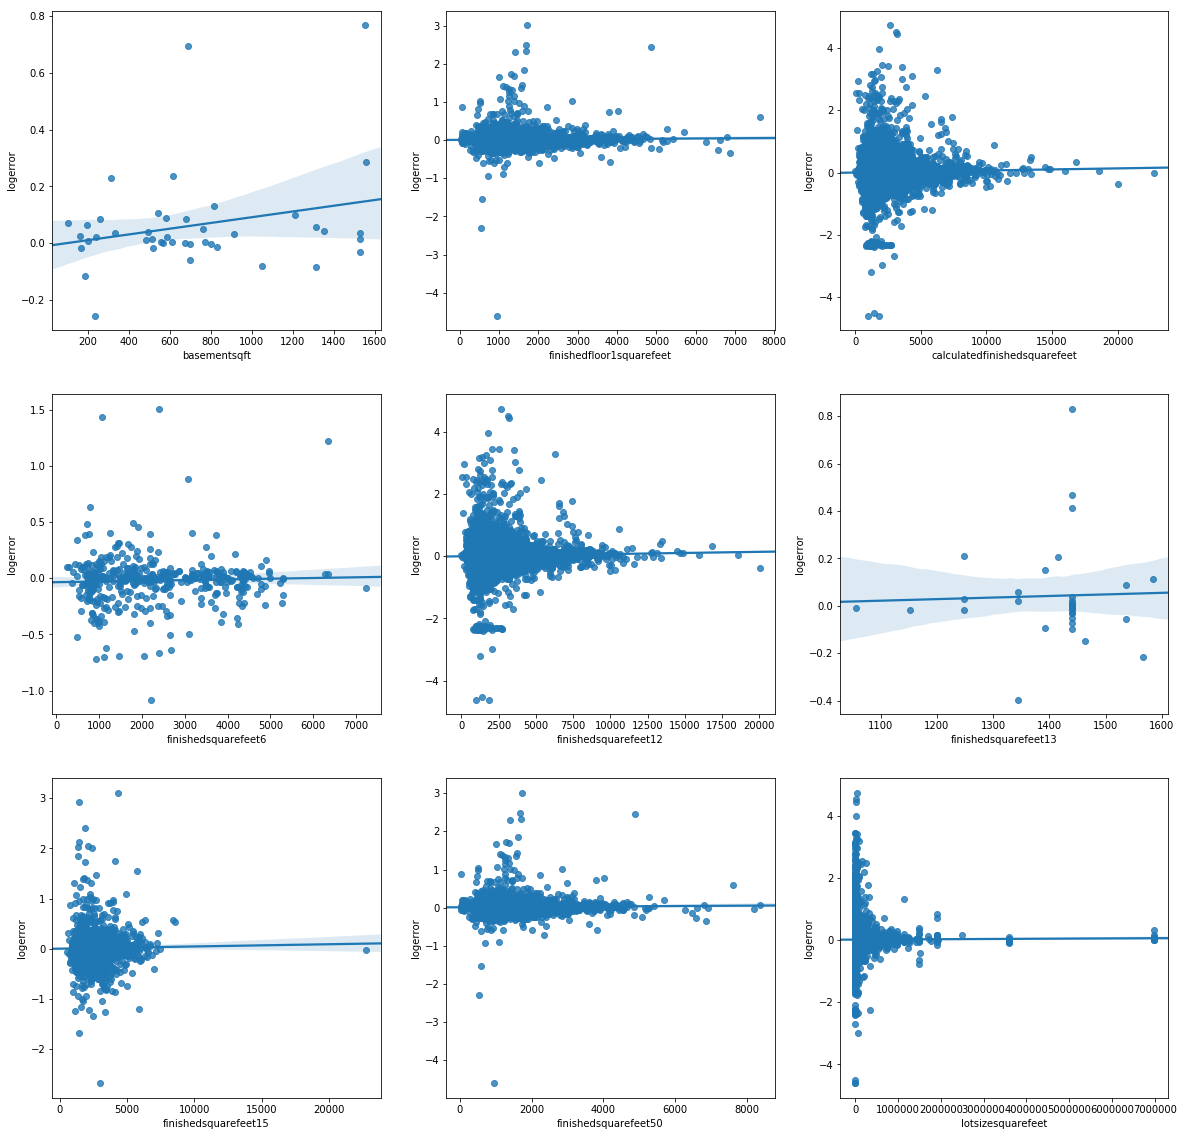

In [18]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(sqrt_feature_col):
    plt.subplot(3,3,idx+1)
    sns.regplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

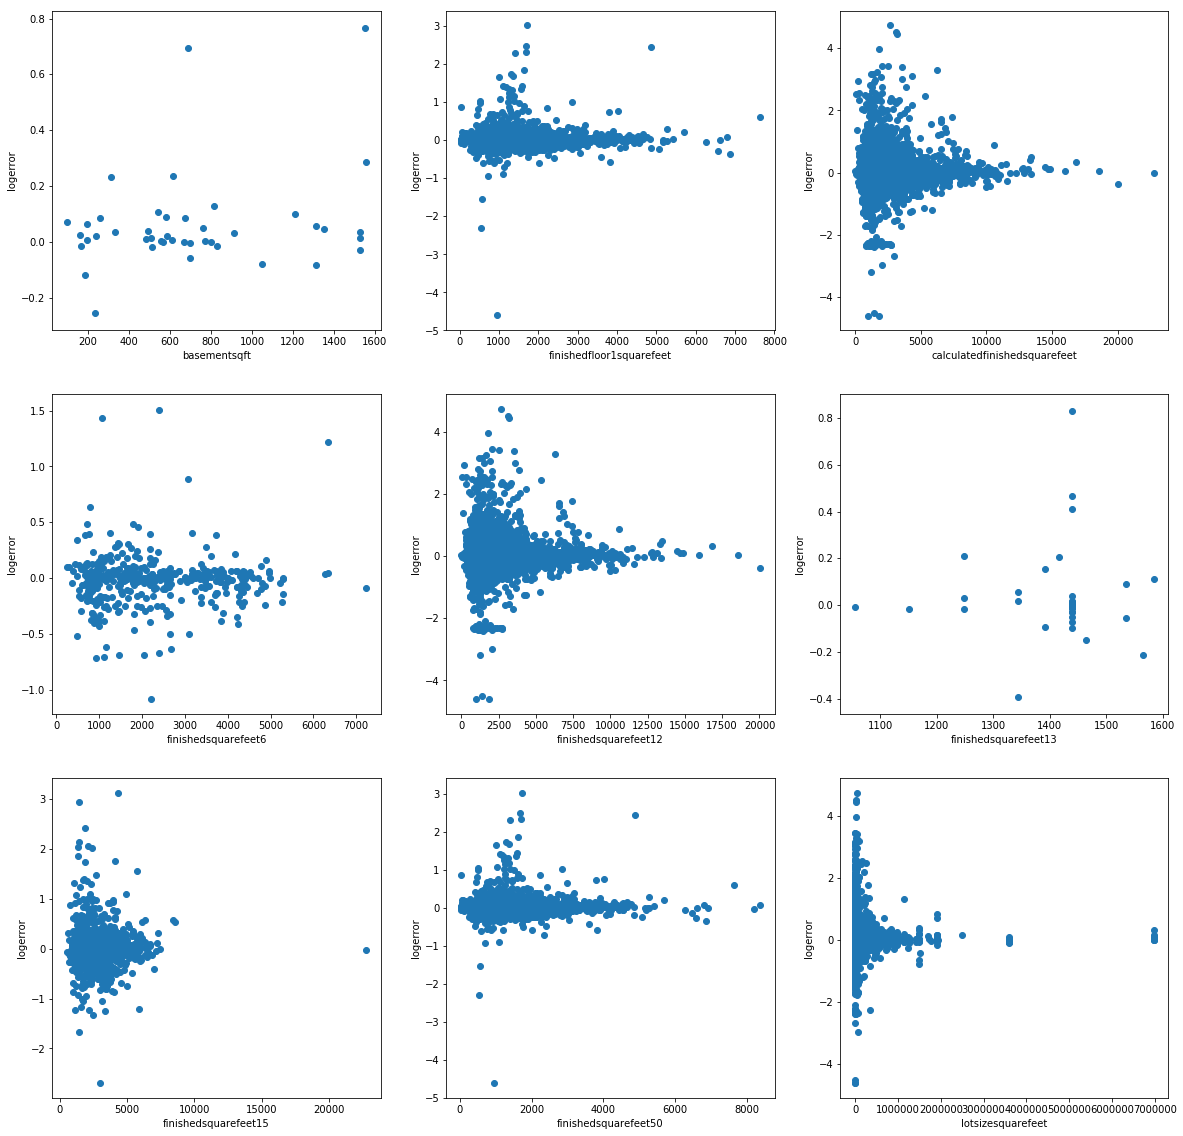

In [19]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(sqrt_feature_col):
    plt.subplot(3,3,idx+1)
    plt.scatter(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

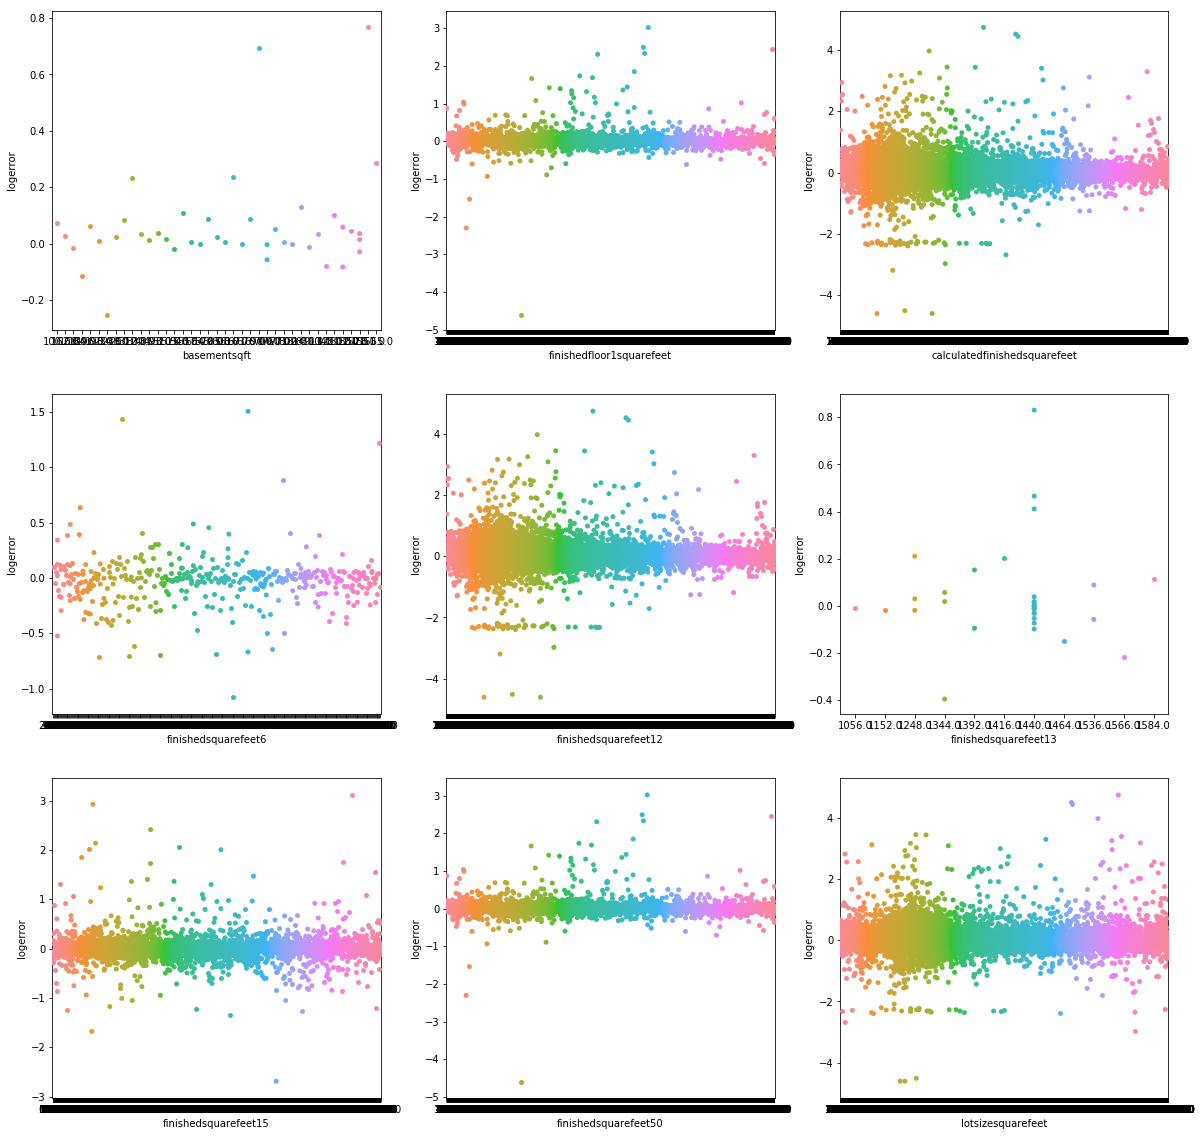

In [20]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(sqrt_feature_col):
    plt.subplot(3,3,idx+1)
    sns.stripplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

## Comments